In [ ]:
import matplotlib
%matplotlib inline
from nilearn import datasets
from nilearn import plotting
import nibabel as nib
import numpy as np
from neurolang import frontend as fe

In [ ]:
destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])
destrieux_dataset['labels']

In [ ]:
nl = fe.RegionFrontend()
for label_number, name in destrieux_dataset['labels']:
    name = name.decode()
    if not name.startswith('L ') or ('S_' not in name and 'Lat_Fis' not in name):
        continue

    # Create a region object
    region = nl.create_region(destrieux_map, label=label_number)

    # Fine tune the symbol name
    name = 'L_' + name[2:].replace('-', '_')
    nl.add_region(region, result_symbol_name=name)

In [ ]:
from neurolang import regions

In [ ]:
oxplane = regions.PlanarVolume((0, 0, 0), (1, 0, 0))
ox_plane_vbr = oxplane.to_explicit_vbr(destrieux_map.affine, destrieux_map.shape)
nl.add_region(ox_plane_vbr, result_symbol_name='plane_medial')
plotting.plot_roi(ox_plane_vbr.spatial_image())

# Finding intermediate primus of Jensen

Initially, we were looking for intra parietal sulcus. We got intermediate primus of Jensen instead.
Antonia's hypothesis for why it didn't return the intra parietal sulcus:
Destrieux combines intra parietal sulcus AND transverse parietal sulci, making the region bigger which breaks the anatomical positional relationship between this region and the regions we are using for finding it.

In [ ]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.left_of(x, nl.symbols.plane_medial)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Finding post central sulcus from interm prim Jensen

This did not work
Antonia's hypothesis: that's because of the bounding boxes representation of regions in neurolang. Central and post central sulci are parellel but not perfectly vertically in the lateral surface.

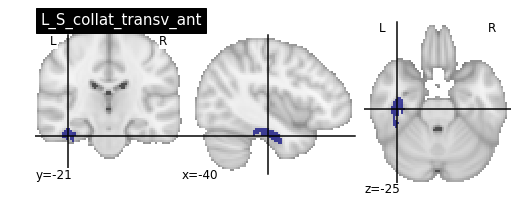

In [27]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_interm_prim_Jensen)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Looking for precentral inferior

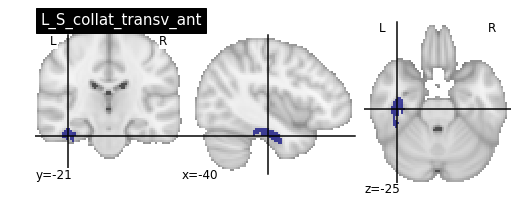

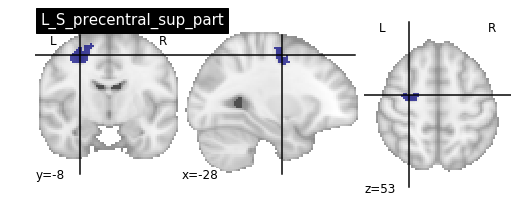

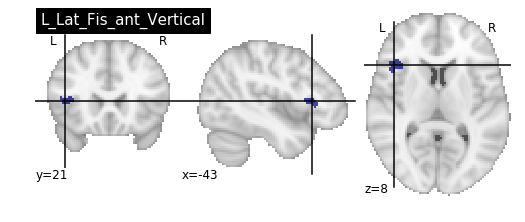

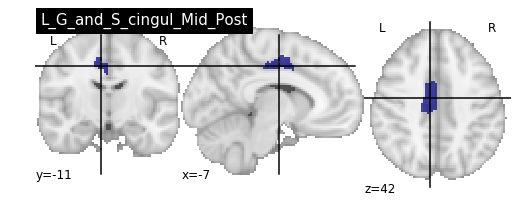

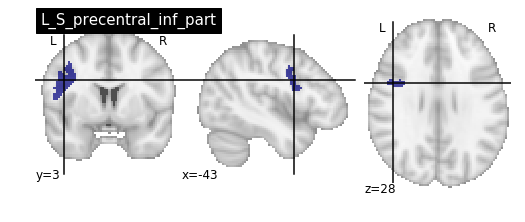

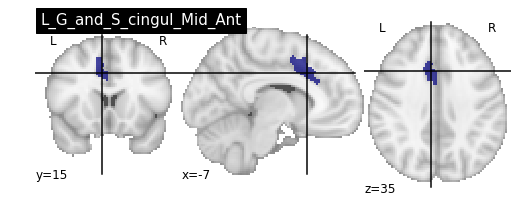

In [32]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Collateral sulcus: anterior part

This works very well

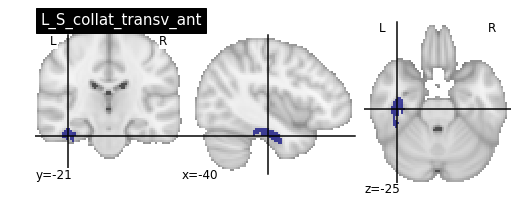

In [33]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Looking for collateral posterior

We found occipital anterior instead

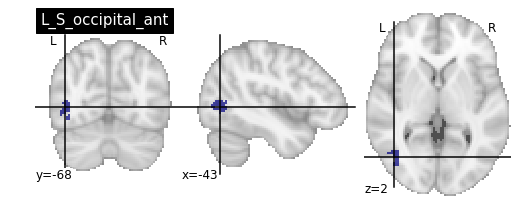

In [36]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_calcarine)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

# Looking for sub-parietal or marginal sulci

We found intraparietal instead

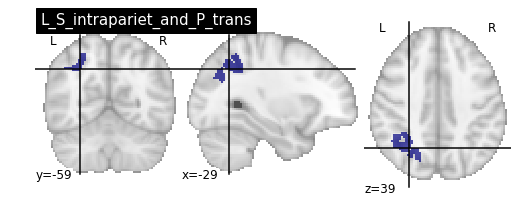

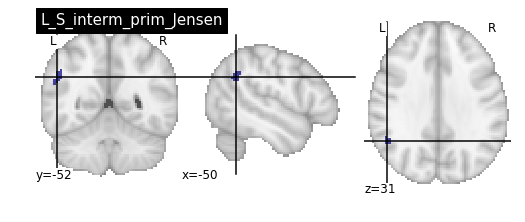

In [42]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine)
    )
)
res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

In [40]:
res

ec639cb6-b1d9-11e8-a9ba-88e9fe754def: typing.AbstractSet[neurolang.regions.Region] = []